# A Deep Dive into Ford GoBike System Data
## by Ahmed Sabry

## Investigation Overview

> We'll check one of the main feature of interest which is the trip duration and we'll look into it and its relationship with some other features as well

## Dataset Overview

> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in December 2019.

> It has **150,102 rows** and **14 columns**
Each trip is anonymized and includes:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Bike Share for all trip

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201912-baywheels-tripdata.csv")
#It seems that the rental_access method is missed in the majority of data, so we w'll remove it
df.drop(columns=["rental_access_method"], inplace=True)

#We have enough points, so we can drop the null values from this dataset.
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

#It seems that we need to clean change some columns data types
df["start_time"] = pd.to_datetime(df["start_time"])
df["end_time"] = pd.to_datetime(df["end_time"])

df["start_station_id"] = df["start_station_id"].astype(int).astype(str)
df["end_station_id"] = df["end_station_id"].astype(int).astype(str)
df["bike_id"] = df["bike_id"].astype(str)

user_types = ['Subscriber', 'Customer']
df["user_type"] = df["user_type"].astype("category")

#Let's have a column for the week-day
df["week_day"] = df["start_time"].dt.weekday_name
df["week_day"] = pd.Categorical(df['week_day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

#Let's have a column for the start-hour
df["day_hour"] = df["start_time"].dt.hour

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The histogram of trip duration in seconds

> - The trip duration seems to be right-skewed. This means that there are more points on the left of the median than the right.
> - This means that the median is higher than the mean of the sample.
> - Also, when can see it's unimodal because it has one peak only, no more.
> - We can see that there are many outliers to the right of the distribution which represent long trips.

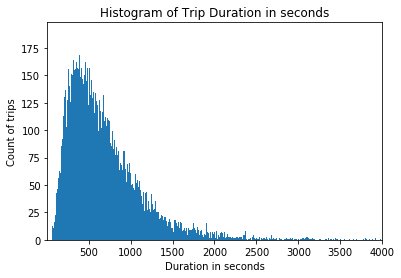

In [4]:
bins = np.arange(df["duration_sec"].min(), df["duration_sec"].max()+1,1)
plt.hist(data=df, x="duration_sec", bins=bins)
plt.title("Histogram of Trip Duration in seconds")
plt.xlabel("Duration in seconds")
plt.ylabel("Count of trips")
plt.xlim([6,4000])
plt.show();

## Trip duration over weekdays

> We can see that trips have most of the trips under 2000 seconds over all the week days.
> There are some differences from one day to another.

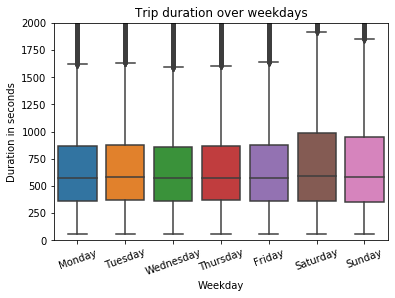

In [4]:
#We'll check the trip duration in seconds over the week days
sb.boxplot(data = df , x = 'week_day' , y = 'duration_sec')
plt.title('Trip duration over weekdays')
plt.xlabel('Weekday')
plt.ylabel('Duration in seconds')
plt.ylim([0,2000])
plt.xticks(rotation=20)
plt.show()

## Trip Duration over different wekdays and day hours

> We can see more shade of violent rides which reflects trips very late from 20:00 to 1:00 at the zone of short trips.

> While Blue-scale trips which reflects the mid-day trips are higher in duration.

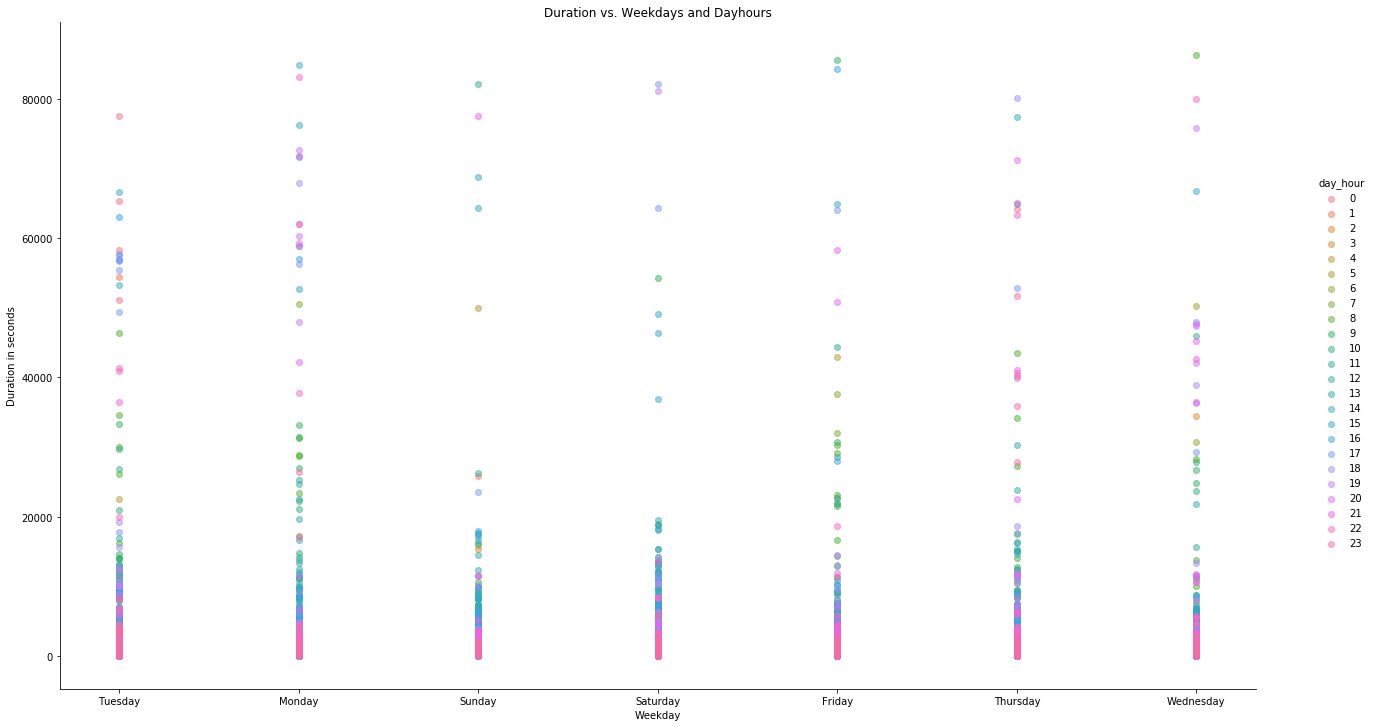

In [6]:
grid = sb.FacetGrid(data =  df, hue = 'day_hour', height = 10)
grid.map(plt.scatter, 'week_day','duration_sec', alpha = 0.5)
plt.title('Duration vs. Weekdays and Dayhours')
plt.xlabel('Weekday')
plt.ylabel('Duration in seconds')
grid.add_legend()
plt.gcf().set_size_inches(20, 10)
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!